In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import statistics
import time
from math import exp
import math 

In [2]:
img_dir = "sample_images1" # Enter Directory of all images from sample_images1
data_path = os.path.join(img_dir,'*')
img_files = glob.glob(data_path)
img_files

['sample_images1/einstein.jpg',
 'sample_images1/Baboon.bmp',
 'sample_images1/ben.png',
 'sample_images1/Lena.bmp']

In [3]:
def OneDimGauss(x_val,mean_val,variance_val): #1-Dimensional Gauss Function
    return np.exp(-np.power(x_val - mean_val, 2.) / (2*variance_val))/math.sqrt(2*math.pi*variance_val)

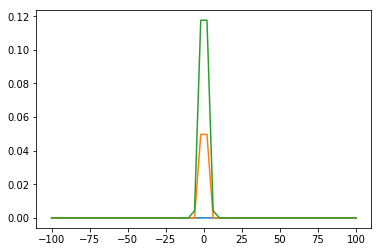

In [4]:
x_val=np.linspace(-100, 100) #Show results with the plot
for mean_val,variance_val in [(0,0.2),(0,1.0),(0,5.0)]:
    plt.plot(x_val, OneDimGauss(x_val, mean_val, variance_val))
plt.show()

In [ ]:
#Create 3x3,5x5,7x7 Gaussian Kernels
kernel3x3=[[1,2,1],[2,4,2],[1,2,1]]
kernel5x5=[[1,1,2,1,1],[1,2,4,2,1],[2,4,8,4,2],[1,2,4,2,1],[1,1,2,1,1]]
kernel7x7=[[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]]

In [ ]:
#Sum function to sum up the all elements in a kernel
sums=[0,0,0]
def Sum(size,kernel,desk):
    for i in range(size):
        for j in range(size):
            sums[desk] += kernel[i][j]

    print(sums)
    
Sum(3,kernel3x3,0)
Sum(5,kernel5x5,1)
Sum(7,kernel7x7,2)
        
        

In [ ]:
#Do normalization on filters dividing by the sum of coefficient
normal3x3=np.zeros((3,3),np.float32)
normal5x5=np.zeros((5,5),np.float32)
normal7x7=np.zeros((7,7),np.float32)
def Normalize(kernel,size):
    for i in range(size):
        for j in range(size):
            if size==3:
                normal3x3[i][j]=kernel3x3[i][j]/sums[0]
            elif size==5:
                normal5x5[i][j]=kernel5x5[i][j]/sums[1]
            elif size==7:
                normal7x7[i][j]=kernel7x7[i][j]/sums[2]            
Normalize(kernel3x3,3)
Normalize(kernel5x5,5)
Normalize(kernel7x7,7)

In [ ]:
#read & pad images on the sample_images1 and put them in seperate lists
img_list=[]
padded_list3=[]
padded_list5=[]
padded_list7=[]
for s in img_files:
    img = cv2.imread(s,cv2.IMREAD_GRAYSCALE)
    #pad_width=(kernel-1)/2
    img3 = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    img5 = np.pad(img, pad_width=2, mode='constant', constant_values=0)
    img7 = np.pad(img, pad_width=3, mode='constant', constant_values=0)
    
    img_list.append(img)
    padded_list3.append(img3)
    padded_list5.append(img5)
    padded_list7.append(img7)

In [9]:
#create new images 
new_imgs=[]
npadded_list3=[]
npadded_list5=[]
npadded_list7=[]
for i in range(len(img_list)):
    row=img_list[i].shape[0]
    col=img_list[i].shape[1]
    new_imgs.append(np.zeros((row,col),np.uint8))
    
#Add pad to newly created images and put them in a list
for s in range(len(img_list)):
    nimg=new_imgs[s]
    
    nimg3 = np.pad(nimg, pad_width=1, mode='constant', constant_values=0)
    nimg5 = np.pad(nimg, pad_width=2, mode='constant', constant_values=0)
    nimg7 = np.pad(nimg, pad_width=3, mode='constant', constant_values=0)
    

    npadded_list3.append(nimg3)
    npadded_list5.append(nimg5)
    npadded_list7.append(nimg7)
#list for median filter
medlist3=[]
medlist5=[]
medlist7=[]

In [10]:
#Implement each normlized filter to images from sample_images1
def OperationFunc(kernel_size,img_num,flagNormal):
    imagerow=new_imgs[img_num].shape[0] 
    imagecol=new_imgs[img_num].shape[1]
    #Apply filters by iterating through images
    for s in range(imagerow):
        for d in range(imagecol):
            sum=0
            for i in range(kernel_size):
                for j in range(kernel_size):

                   
                    if flagNormal==True: #Apply filter
                        if kernel_size==3:
                            ker_indx=normal3x3[i][j]#find kernel index  
                            nimg=padded_list3[img_num]#find image to apply
                            img_indx=nimg[s+i][d+j]#find image index
                            mult=ker_indx*img_indx#multiply kernel index and image index
                            #
                            sum=sum+mult #the value that we're going to write in the middle
                            img=npadded_list3[img_num]
                            img[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=sum
                            npadded_list3[img_num]=img #write the calculated value to the right place in the image
            #Do the same thing for every kernel size
                        elif kernel_size==5:
                            ker_indx=normal5x5[i][j]
                            nimg=padded_list5[img_num]
                            img_indx=nimg[s+i][d+j]
                            mult=ker_indx*img_indx
                            
                            sum=sum+mult
                            img=npadded_list5[img_num]
                            img[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=sum
                            npadded_list5[img_num]=img
                            
                        elif kernel_size==7:
                            ker_indx=normal7x7[i][j]
                            nimg=padded_list7[img_num]
                            img_indx=nimg[s+i][d+j]
                            mult=ker_indx*img_indx
                            
                            sum=sum+mult
                            img=npadded_list7[img_num]
                            img[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=sum
                            npadded_list7[img_num]=img    

In [ ]:
#filter3x3 Normalization
normal3=[]
for i in range(len(img_list)):
   
    OperationFunc(3,i,True)#
    normal3.append(npadded_list3[i])
    cv2.imshow("3x3Normal Original-Normal",np.hstack((padded_list3[i],normal3[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#filter5x5 Normalization
normal5=[]
for i in range(len(img_list)):
   
    OperationFunc(5,i,True)#
    normal5.append(npadded_list5[i])
    cv2.imshow("5x5Normal Original-Normal",np.hstack((padded_list5[i],normal5[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#filter7x7 Normalization
normal7=[]
for i in range(len(img_list)):
   
    OperationFunc(7,i,True)
    normal7.append(npadded_list7[i])
    cv2.imshow("7x7Normal Original-Normal",np.hstack((padded_list7[i],normal7[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#sharp3x3 -Use gausian filters as sharpening filter
alfas=[1,20,100] # alfa values
sharp3alf0=[]
sharp3alf1=[]
sharp3alf2=[]
for i in range(len(img_list)):
    # F + alfa(F-F*H) -> F=image F*H=blurred image
    sharp3alf0.append(padded_list3[i]+(alfas[0]*(padded_list3[i]-normal3[i])))
    sharp3alf1.append(padded_list3[i]+(alfas[1]*(padded_list3[i]-normal3[i])))
    sharp3alf2.append(padded_list3[i]+(alfas[2]*(padded_list3[i]-normal3[i])))         
    cv2.imshow("Original3x3-sharp1-sharp2-sharp3",np.hstack((padded_list3[i],sharp3alf0[i],sharp3alf1[i],sharp3alf2[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [ ]:
#sharp5x5 -Use gausian filters as sharpening filter
alfas=[1,20,100] # alfa values
sharp5alf0=[]
sharp5alf1=[]
sharp5alf2=[]
for i in range(len(img_list)):
    # F + alfa(F-F*H) -> F=image F*H=blurred image
    sharp5alf0.append(padded_list5[i]+(alfas[0]*(padded_list5[i]-normal5[i])))
    sharp5alf1.append(padded_list5[i]+(alfas[1]*(padded_list5[i]-normal5[i])))
    sharp5alf2.append(padded_list5[i]+(alfas[2]*(padded_list5[i]-normal5[i])))         
    cv2.imshow("Original5x5-sharp1-sharp2-sharp3",np.hstack((padded_list5[i],sharp5alf0[i],sharp5alf1[i],sharp5alf2[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#sharp7x7 -Use gausian filters as sharpening filter
alfas=[1,20,100] # alfa values
sharp7alf0=[]
sharp7alf1=[]
sharp7alf2=[]
for i in range(len(img_list)):
    # F + alfa(F-F*H) -> F=image F*H=blurred image
    sharp7alf0.append(padded_list7[i]+(alfas[0]*(padded_list7[i]-normal7[i])))
    sharp7alf1.append(padded_list7[i]+(alfas[1]*(padded_list7[i]-normal7[i])))
    sharp7alf2.append(padded_list7[i]+(alfas[2]*(padded_list7[i]-normal7[i])))         
    cv2.imshow("Original7x7-sharp1-sharp2-sharp3",np.hstack((padded_list7[i],sharp7alf0[i],sharp7alf1[i],sharp7alf2[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img_dir = "sample_images2" # Enter Directory of all images from sample_images2
data_path = os.path.join(img_dir,'*')
img_files2 = glob.glob(data_path)
img_files2

In [ ]:
#read & pad images on the sample_images2 and put them in seperate lists
img_list2=[]
padded_list3s=[]
padded_list5s=[]
padded_list7s=[]
for s in img_files2:
    imgs = cv2.imread(s,cv2.IMREAD_GRAYSCALE)
    #pad_width=(kernel-1)/2
    img3s = np.pad(imgs, pad_width=1, mode='constant', constant_values=0)
    img5s = np.pad(imgs, pad_width=2, mode='constant', constant_values=0)
    img7s = np.pad(imgs, pad_width=3, mode='constant', constant_values=0)
    
    img_list2.append(imgs)
    padded_list3s.append(img3s)
    padded_list5s.append(img5s)
    padded_list7s.append(img7s)

In [ ]:
#create new images 
new_imgs2=[]
npadded_list3s=[]
npadded_list5s=[]
npadded_list7s=[]
for i in range(len(img_list2)):
    row=img_list2[i].shape[0]
    col=img_list2[i].shape[1]
    new_imgs2.append(np.zeros((row,col),np.uint8))
    
#Add pad to newly created images and put them in a list
for s in range(len(img_list2)):
    nimgs=new_imgs2[s]
    
    nimg3s = np.pad(nimgs, pad_width=1, mode='constant', constant_values=0)
    nimg5s = np.pad(nimgs, pad_width=2, mode='constant', constant_values=0)
    nimg7s = np.pad(nimgs, pad_width=3, mode='constant', constant_values=0)
    

    npadded_list3s.append(nimg3s)
    npadded_list5s.append(nimg5s)
    npadded_list7s.append(nimg7s)
#lists for median filter
medlist3=[]
medlist5=[]
medlist7=[]

In [ ]:
#Function to remove salt and pepper noise by using 3x3,5x5 and 7x7 median filters
def SaltPepper(kernel_size,img_num,flagMedian):
    imagerow=new_imgs2[img_num].shape[0] 
    imagecol=new_imgs2[img_num].shape[1]
    #Apply filters by iterating through images
    for s in range(imagerow):
        for d in range(imagecol):
            sum=0
            for i in range(kernel_size):
                for j in range(kernel_size):
                    if flagMedian==True: #apply median filter
                        
                        if kernel_size==3:
                            nimgs=padded_list3s[img_num]
                            medlist3.append(nimgs[s+i][d+j]) #append the images to medlist3
            
                            
                        if kernel_size==5:   
                            nimgs=padded_list5s[img_num]
                            medlist5.append(nimgs[s+i][d+j]) 
            

                        if kernel_size==7:   
                            nimgs=padded_list7s[img_num]
                            medlist7.append(nimgs[s+i][d+j]) 
            if kernel_size==3:
                a=statistics.median(medlist3)#find median 
                medlist3.clear() #clear the list
                imgs=npadded_list3s[img_num] 
                imgs[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=a 
                npadded_list3s[img_num]=imgs #put the filtered image to npadded_list3s
            if kernel_size==5:
                a=statistics.median(medlist5)#find median 
                medlist5.clear() 
                imgs=npadded_list5s[img_num] 
                imgs[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=a
                npadded_list5s[img_num]=imgs
            if kernel_size==7:
                a=statistics.median(medlist7)#find median 
                medlist7.clear()
                imgs=npadded_list7s[img_num]
                imgs[s+int((kernel_size-1)/2)][d+int((kernel_size-1)/2)]=a
                npadded_list7s[img_num]=imgs

In [ ]:
#3x3 Remove salt and pepper noise by using median filter 
for i in range(len(img_list2)):
    SaltPepper(3,i,True)
    cv2.imshow("SaltAndPepper3x3 Original-Filtred",np.hstack((padded_list3s[i],npadded_list3s[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#5x5 Remove salt and pepper noise by using median filter 
for i in range(len(img_list2)):
    SaltPepper(5,i,True)
    cv2.imshow("SaltAndPepper5x5 Original-Filtred",np.hstack((padded_list5s[i],npadded_list5s[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
#7x7 Remove salt and pepper noise by using median filter 
for i in range(len(img_list2)):
    SaltPepper(7,i,True)
    cv2.imshow("SaltAndPepper Original7x7-Filtred",np.hstack((padded_list7s[i],npadded_list7s[i])))
    cv2.waitKey(0)
    cv2.destroyAllWindows()